**We will start by importing frameworks and libraries.**

In [ ]:
pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 35.2 MB/s 
     |████████████████████████████████| 13.6 MB 42.4 MB/s 
     |████████████████████████████████| 108 kB 73.3 MB/s 


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import pennylane as qml
import sklearn
import seaborn as sns
import tensorflow as tf

**Functions used for preprocesing**

In [ ]:
def encode(dataframe, column):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder

    values = np.array(dataframe[column])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    list_onehot = []
    for i in range(onehot_encoded.shape[1]):
        list_onehot.append(column+str(i))

    df1 = pd.DataFrame(onehot_encoded, columns = list_onehot)

    dataframe [list_onehot[:-1]] = df1 [list_onehot[:-1]]

    return dataframe

def print_results():
    mae1 = history.history['mae']
    val_mae1 = history.history['val_mae']
    loss1 = history.history['loss']
    val_loss1 = history.history['val_loss']

    epochs1 = range(len(mae1))

    plt.figure(figsize=(16, 4))

    plt.plot(epochs1, mae1, 'b', label='Training mae')
    plt.plot(epochs1, val_mae1, 'r', label='Validation mae')
    plt.title('Training and Validation mae')
    plt.grid()
    plt.legend()

    plt.figure(figsize=(16, 4))

    plt.plot(epochs1, loss1, 'b', label='Training Loss (mse)')
    plt.plot(epochs1, val_loss1, 'r', label='Validation Loss (mse)')
    plt.title('Training and Validation loss (mse)')
    plt.grid()
    plt.legend()

    plt.show()

**Preprocess**

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

column_list = df.columns.tolist()
columns_to_encode = column_list[:5]
for column in columns_to_encode:
    encode(df, column)

column_list = df.columns.tolist()[5:]
df = df[column_list]
dict_max = {}

for i in column_list:
    dict_max[i] = df[i].abs().max()

for i in column_list:
    df[i] = df[i]/dict_max[i]

index_list = df.index.tolist()
random_index_list = np.random.RandomState(0).choice(index_list, len(index_list), replace=False).tolist()

train_total = int(len(index_list)*0.7)
train_index_list = random_index_list[:train_total]

validation_total = int(len(index_list)*0.15)
validation_index_list = random_index_list[train_total:(train_total + validation_total)]

test_index_list = random_index_list[(train_total + validation_total):]

train_df = df.iloc[train_index_list]
validation_df = df.iloc[validation_index_list]
test_df = df.iloc[test_index_list]

new_col_list = df.columns.tolist()[1:]

train_set = train_df[new_col_list]
validation_set = validation_df[new_col_list]
test_set = test_df[new_col_list]

X_train = train_set
y_train = df['math score'][train_index_list]

X_val = validation_set
y_val = df['math score'][validation_index_list]

X_test = test_set
y_test = df['math score'][test_index_list]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


**Here we are creating an empty dataframe to save all the results**

In [ ]:
df_results = pd.DataFrame(columns = ['Hybrid/Classical', 'Qubits', 'Quantum layers', 'Hidden neurons', 'Loss (mse)', 'Metric (mae)'])

**Since we will be always using 5 epochs, we are going to set it as a constant**

In [ ]:
epochs = 5

**First Classical model:**

*   Input Layer: 10 Neurons
*   1 hidden Layer: 2 neurons
*   Activation functions: Relu
*   Output Layer: 1 Neuron (Regression)
*   Batch normalization after each hidden layer



In [ ]:
tf.keras.backend.clear_session()
hidden_neurons = 2

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_neurons, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 223
Trainable params: 199
Non-trainable pa

**We will use the following hyperparameters:**

*   Bath size: 12
*   Epochs: 5
*   Loss: Mean squared error
*   Optimizer: Adam
*   Metrics: Mean absolute error
*   Classical model: No qubits, no quantum layers

Epoch 1/5
59/59 [==============================] - 2s 6ms/step - loss: 1.0238 - mae: 0.8583 - val_loss: 0.1703 - val_mae: 0.3375
Epoch 2/5
59/59 [==============================] - 0s 4ms/step - loss: 0.4794 - mae: 0.5762 - val_loss: 0.1506 - val_mae: 0.3159
Epoch 3/5
59/59 [==============================] - 0s 3ms/step - loss: 0.2484 - mae: 0.4005 - val_loss: 0.1126 - val_mae: 0.2603
Epoch 4/5
59/59 [==============================] - 0s 5ms/step - loss: 0.1243 - mae: 0.2732 - val_loss: 0.0839 - val_mae: 0.2081
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0437 - mae: 0.1642
Test loss (mse): 0.04374070465564728
Test mean absolute error: 0.16415897011756897


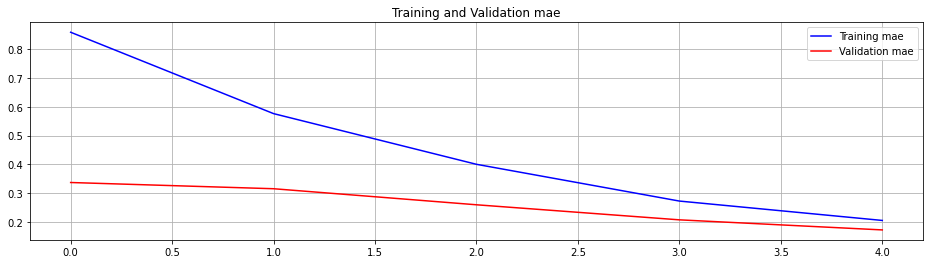

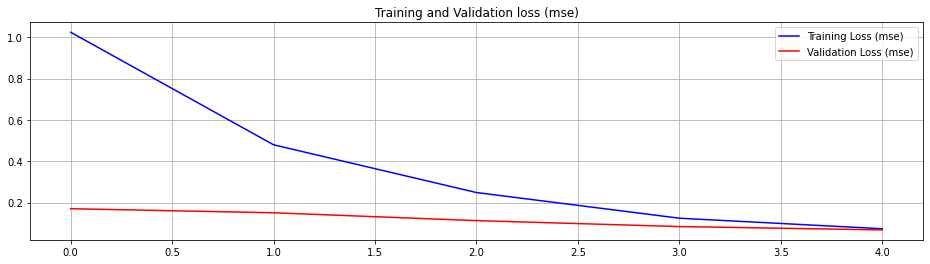

In [ ]:
model_type = 'Classical'
model_qubits = None
model_quantum_layers = None
batch_size = 12
hidden_neurons = hidden_neurons
epochs = epochs

# Definition of the settings
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test)

df_results.loc[len(df_results)] = [model_type, model_qubits, model_quantum_layers, hidden_neurons, test_loss, test_mae]
print('Test loss (mse):', test_loss)
print('Test mean absolute error:', test_mae)
print_results()

**Second Classical model:**

*   Input Layer: 10 Neurons
*   1 hidden Layers: 3 neurons
*   Activation functions: Relu
*   Output Layer: 1 Neuron (Regression)
*   Batch normalization after each hidden layer

In [ ]:
tf.keras.backend.clear_session()
hidden_neurons = 3

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_neurons, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 batch_normalization_1 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 239
Trainable params: 213
Non-trainable pa

**We will use the following hyperparameters:**

*   Bath size: 12
*   Epochs: 5
*   Loss: Mean squared error
*   Optimizer: Adam
*   Metrics: Mean absolute error
*   Classical model: No qubits, no quantum layers

Epoch 1/5
59/59 [==============================] - 1s 6ms/step - loss: 0.8639 - mae: 0.6469 - val_loss: 0.5048 - val_mae: 0.6624
Epoch 2/5
59/59 [==============================] - 0s 3ms/step - loss: 0.4972 - mae: 0.5338 - val_loss: 0.3306 - val_mae: 0.5049
Epoch 3/5
59/59 [==============================] - 0s 7ms/step - loss: 0.3170 - mae: 0.4429 - val_loss: 0.2106 - val_mae: 0.3817
Epoch 4/5
59/59 [==============================] - 0s 6ms/step - loss: 0.2094 - mae: 0.3713 - val_loss: 0.1493 - val_mae: 0.3106
Epoch 5/5
5/5 [==============================] - 0s 5ms/step - loss: 0.1105 - mae: 0.2678
Test loss (mse): 0.11052945256233215
Test mean absolute error: 0.2678212821483612


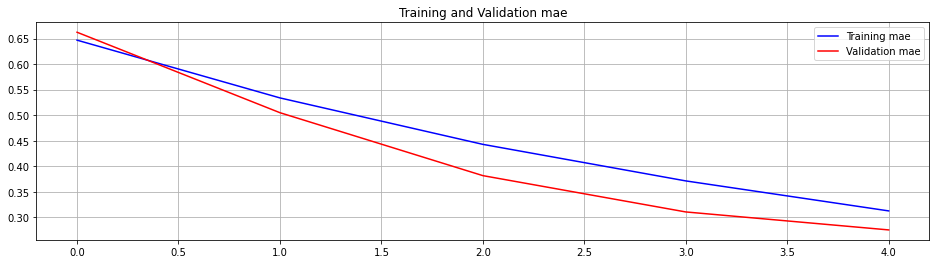

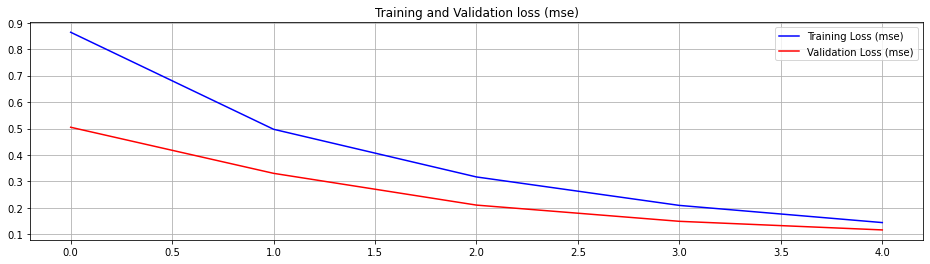

In [ ]:
model_type = 'Classical'
model_qubits = None
model_quantum_layers = None
batch_size = 12
hidden_neurons = hidden_neurons
epochs = epochs

# Definition of the settings
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test)

df_results.loc[len(df_results)] = [model_type, model_qubits, model_quantum_layers, hidden_neurons, test_loss, test_mae]
print('Test loss (mse):', test_loss)
print('Test mean absolute error:', test_mae)
print_results()

**Now we need to define the number of qubits and quantum layers**

In [ ]:
n_qubits = 2
n_layers = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

**First Hybrid model:**

*   Input Layer: 10 Neurons
*   1 hidden Layers: 2 neurons
*   Activation functions: Relu
*   2 quantum layers
*   2 qubits
*   Output Layer: 1 Neuron (Regression)
*   Batch normalization after each hidden layer

In [ ]:
tf.keras.backend.clear_session()
hidden_neurons = 2

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_neurons, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits),
        tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 keras_layer (KerasLayer)    (None, 2)                 0 (unused)
                                                                 
 dense_2 (Dense)             (None, 1)                 3

**We will use the following hyperparameters:**

*   Bath size: 12
*   Epochs: 5
*   Loss: Mean squared error
*   Optimizer: Adam
*   Metrics: Mean absolute error
*   Hybrid model: 2 qubits, 2 quantum layers

Epoch 1/5
59/59 [==============================] - 48s 810ms/step - loss: 0.2730 - mae: 0.3833 - val_loss: 0.0376 - val_mae: 0.1581
Epoch 2/5
59/59 [==============================] - 37s 621ms/step - loss: 0.1768 - mae: 0.3167 - val_loss: 0.0505 - val_mae: 0.1855
Epoch 3/5
59/59 [==============================] - 37s 634ms/step - loss: 0.1417 - mae: 0.2912 - val_loss: 0.0538 - val_mae: 0.1907
Epoch 4/5
59/59 [==============================] - 37s 627ms/step - loss: 0.1171 - mae: 0.2640 - val_loss: 0.0563 - val_mae: 0.1915
Epoch 5/5
5/5 [==============================] - 4s 709ms/step - loss: 0.0783 - mae: 0.2102
Test loss (mse): 0.07834401726722717
Test mean absolute error: 0.21019034087657928


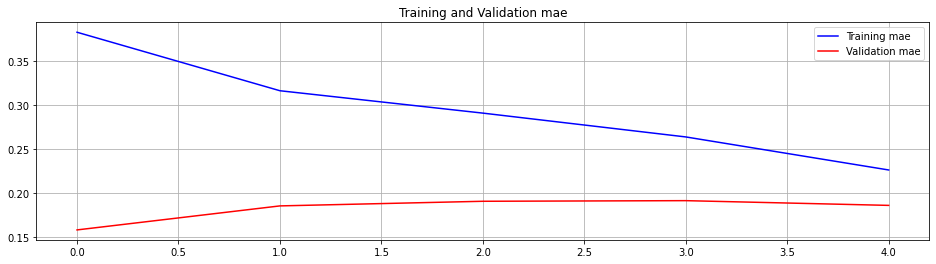

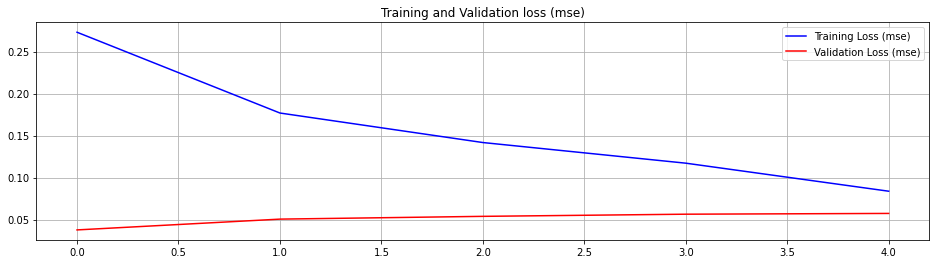

In [ ]:
model_type = 'Hybrid'
model_qubits = n_qubits
model_quantum_layers = n_layers
batch_size = 12
hidden_neurons = hidden_neurons
epochs = epochs

# Definition of the settings
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test)

df_results.loc[len(df_results)] = [model_type, model_qubits, model_quantum_layers, hidden_neurons, test_loss, test_mae]
print('Test loss (mse):', test_loss)
print('Test mean absolute error:', test_mae)
print_results()

**Re-definition of number of qubits and quantum layers**

In [ ]:
n_qubits = 3
n_layers = 3
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

**Second Hybrid model:**

*   Input layer: 10 Neurons
*   1 hidden layers: 2 neurons
*   Activation functions: Relu
*   3 quantum layers
*   3 qubits
*   Output Layer: 1 Neuron (Regression)
*   Batch normalization after each hidden layer

In [ ]:
tf.keras.backend.clear_session()
hidden_neurons = 3

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_neurons, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits),
        tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 batch_normalization_1 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 keras_layer (KerasLayer)    (None, 3)                 0 (unused)
                                                                 
 dense_2 (Dense)             (None, 1)                 4

**We will use the following hyperparameters:**

*   Bath size: 12
*   Epochs: 5
*   Loss: Mean squared error
*   Optimizer: Adam
*   Metrics: Mean absolute error
*   Hybrid model: 3 qubits, 3 quantum layers

Epoch 1/5
59/59 [==============================] - 81s 1s/step - loss: 1.4886 - mae: 1.0933 - val_loss: 1.7540 - val_mae: 1.3033
Epoch 2/5
59/59 [==============================] - 76s 1s/step - loss: 0.9469 - mae: 0.8644 - val_loss: 1.0318 - val_mae: 0.9682
Epoch 3/5
59/59 [==============================] - 74s 1s/step - loss: 0.6747 - mae: 0.7176 - val_loss: 0.5882 - val_mae: 0.6889
Epoch 4/5
59/59 [==============================] - 75s 1s/step - loss: 0.4660 - mae: 0.5832 - val_loss: 0.3772 - val_mae: 0.5236
Epoch 5/5
5/5 [==============================] - 7s 1s/step - loss: 0.3278 - mae: 0.4911
Test loss (mse): 0.32775071263313293
Test mean absolute error: 0.49112313985824585


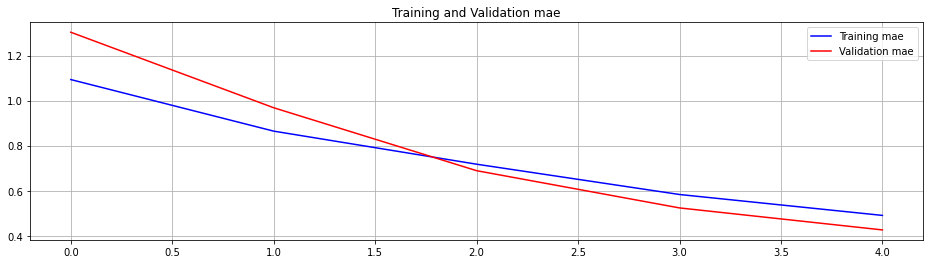

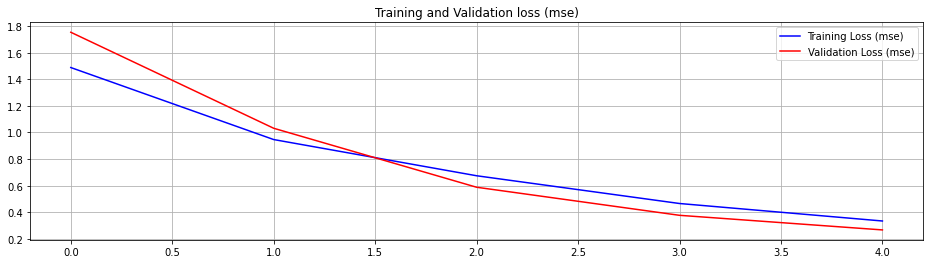

In [ ]:
model_type = 'Hybrid'
model_qubits = n_qubits
model_quantum_layers = n_layers
batch_size = 12
hidden_neurons = hidden_neurons
epochs = epochs

# Definition of the settings
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test)

df_results.loc[len(df_results)] = [model_type, model_qubits, model_quantum_layers, hidden_neurons, test_loss, test_mae]
print('Test loss (mse):', test_loss)
print('Test mean absolute error:', test_mae)
print_results()

**Let's take a look a the results**

In [ ]:
df_results

,Hybrid/Classical,Qubits,Quantum layers,Hidden neurons,Loss (mse),Metric (mae)
0,Classical,None,None,2,0.043741,0.164159
1,Classical,None,None,3,0.110529,0.267821
2,Hybrid,2,2,2,0.078344,0.210190
3,Hybrid,3,3,3,0.327751,0.491123


**Thanks, and please let me know your thoughts and suggestions!**